In [4]:
import ugradio
import numpy as np
import astropy
#import calibrate
import pyfits
from ugradio import nch
from astropy.io import fits
import ugradio.agilent
from ugradio import leo
import matplotlib.pyplot as plt
%matplotlib inline
#import leuschner

In [5]:
b_35_50 = [(pyfits.open(f)) for f in glob.glob('/home/sczhou/ugradio/b-35-50/data_apr19_*.fits')]

In [21]:
def ave(f):
    return sum(f)/len(f)

In [22]:
l_array = []
b_array = []
data_array = [] #first polarization

for i in range(len(b_35_50)):
    l_array.append(b_35_50[i][0].header['L'])
    b_array.append(b_35_50[i][0].header['B'])
    
    data_array.append(sum(b_35_50[i][1].data['auto0_real'])/len(b_35_50[i][1].data['auto0_real']))
    # take the average of each spectrum
    #data_array.append(b_35_50[i][1].data['auto0_real'])

In [20]:
sum(data_array[0])/len(data_array[0])

0.0082125354073241397

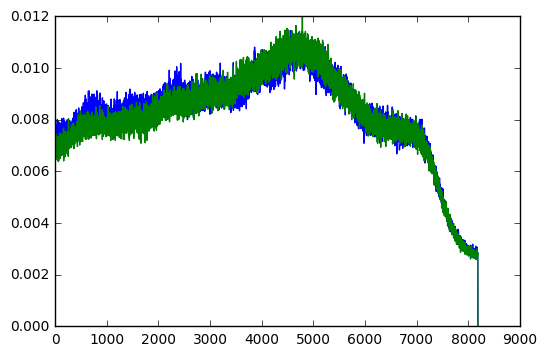

In [19]:
plt.plot(data_array[0])
plt.plot(data_array[1])

In [23]:
print data_array

[0.0082125354073241397, 0.0081311323185673245, 0.0081197619854265213, 0.0082418338220122678, 0.0082124654203425962, 0.008108297730132108, 0.0080778989473628826, 0.0081220773829500104, 0.0081326681238351739, 0.0082488393725270726, 0.0081474060419850503, 0.0082684208983891949, 0.0080435727940084689, 0.0082926835100352037, 0.0083088737043226502, 0.0081329824931799521, 0.008075060470673634, 0.0081541718797097928, 0.0082431082959146806, 0.0082462460661645309, 0.0083214269758400405, 0.0082439793840194397, 0.0082793878018492251, 0.0081493482875885093, 0.0082758082965028734, 0.0081459941417278969, 0.0080828263444345794, 0.0080669599843758988, 0.0082807491991161442, 0.0080993532013735603, 0.0083025301148609287, 0.0081269331050179971, 0.0080641192837447306, 0.0081093105733316406, 0.0082036883983391817, 0.0081589852346724001, 0.0081782528440044189, 0.0081735228221759826, 0.0082119324220002454, 0.0082485558036751172, 0.0080786590457364582, 0.0080985814219047825, 0.00830351681531738, 0.008247432404

### 15.1 cylindrical equidistance projection


In [49]:
l_array = np.array(l_array)
b_array = np.array(b_array)
ex = np.array(ex)
data_array = np.array(data_array)

In [47]:
data_array[0] 

0.0082125354073241397

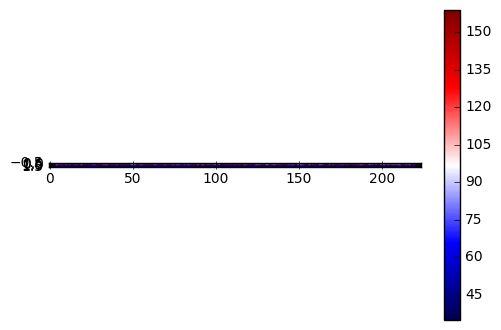

In [48]:
data = [np.array(l_array),np.array(b_array)]
#plt.figure(figsize=(l_array,b_array))
#extent = [min(l_array),max(l_array),min(b_array),max(b_array)],
plt.imshow(data, cmap='seismic')
plt.colorbar()
plt.show()

### 15.1 stereographic projection

In [52]:
x_array = []
y_array = []

for i in range(len(l_array)):
    R = np.tan(0.5*(90-b_array[i]))
    temp_x = R * np.cos(l_array[i])
    temp_y = R * np.sin(l_array[i])
    
    x_array.append(temp_x)
    y_array.append(temp_y)